In [13]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [14]:
Dataset = pd.read_csv("Dataset_male_Final.csv")
display(Dataset)

,Unnamed: 0,Age,Tscore_Hip_total,CRP,Cr,ALP,BUN,P,Ca,PTH,...,BMD_Hip_Neck,Tscore_Hip_neck,Zscore_Hip_neck,BMI,Histroy_Anticoagulant,Active_Smoking,History_Smoking,Calcium_Supplement,History_Diabetes_2,Refracture
0,0,63,-0.200000,5.0,1.0000,90.000000,16.000000,4.000000,8.400000,28.80,...,0.75200,-1.500000,0.500000,40.800000,0,0,0,0,0,0
1,1,69,-0.500000,9.0,1.0384,236.983784,17.019137,3.505219,8.627989,50.85,...,0.73400,-1.400000,-0.300000,40.000000,0,0,0,0,0,1
2,2,60,1.100000,10.0,0.8000,142.000000,17.000000,3.700000,8.600000,15.50,...,0.68900,-1.800000,-0.800000,38.200000,0,1,1,0,0,0
3,3,59,-0.400000,14.0,0.7000,202.000000,17.000000,4.200000,7.900000,50.85,...,0.65400,-2.000000,-1.100000,38.100000,1,1,1,0,1,1
4,4,50,1.500000,1.0,1.2000,146.000000,14.000000,3.000000,8.800000,66.00,...,1.02700,0.700000,1.500000,36.100000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,383,58,0.000000,3.0,3.0000,246.000000,28.000000,4.100000,8.500000,35.00,...,0.72300,-1.100000,0.000000,24.400000,0,0,0,0,0,0
384,384,59,-0.543658,5.0,0.8000,141.000000,14.000000,3.800000,8.600000,35.00,...,0.69818,-1.579244,-0.513953,26.170573,1,0,0,0,0,0
385,385,64,-0.543658,6.0,0.9000,143.000000,14.000000,4.500000,8.500000,56.00,...,0.69818,-1.579244,-0.513953,26.170573,0,0,0,0,0,0
386,386,62,-3.000000,10.0,1.2000,202.000000,17.000000,4.500000,8.300000,68.00,...,0.53200,-2.900000,-1.900000,26.170573,0,0,0,0,0,1


In [15]:
Dataset.drop("Unnamed: 0", axis=1, inplace = True)

In [16]:
display(Dataset)

,Age,Tscore_Hip_total,CRP,Cr,ALP,BUN,P,Ca,PTH,Vit_D3,...,BMD_Hip_Neck,Tscore_Hip_neck,Zscore_Hip_neck,BMI,Histroy_Anticoagulant,Active_Smoking,History_Smoking,Calcium_Supplement,History_Diabetes_2,Refracture
0,63,-0.200000,5.0,1.0000,90.000000,16.000000,4.000000,8.400000,28.80,19.900000,...,0.75200,-1.500000,0.500000,40.800000,0,0,0,0,0,0
1,69,-0.500000,9.0,1.0384,236.983784,17.019137,3.505219,8.627989,50.85,33.313143,...,0.73400,-1.400000,-0.300000,40.000000,0,0,0,0,0,1
2,60,1.100000,10.0,0.8000,142.000000,17.000000,3.700000,8.600000,15.50,25.000000,...,0.68900,-1.800000,-0.800000,38.200000,0,1,1,0,0,0
3,59,-0.400000,14.0,0.7000,202.000000,17.000000,4.200000,7.900000,50.85,33.313143,...,0.65400,-2.000000,-1.100000,38.100000,1,1,1,0,1,1
4,50,1.500000,1.0,1.2000,146.000000,14.000000,3.000000,8.800000,66.00,38.000000,...,1.02700,0.700000,1.500000,36.100000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,58,0.000000,3.0,3.0000,246.000000,28.000000,4.100000,8.500000,35.00,33.000000,...,0.72300,-1.100000,0.000000,24.400000,0,0,0,0,0,0
384,59,-0.543658,5.0,0.8000,141.000000,14.000000,3.800000,8.600000,35.00,32.000000,...,0.69818,-1.579244,-0.513953,26.170573,1,0,0,0,0,0
385,64,-0.543658,6.0,0.9000,143.000000,14.000000,4.500000,8.500000,56.00,38.000000,...,0.69818,-1.579244,-0.513953,26.170573,0,0,0,0,0,0
386,62,-3.000000,10.0,1.2000,202.000000,17.000000,4.500000,8.300000,68.00,29.000000,...,0.53200,-2.900000,-1.900000,26.170573,0,0,0,0,0,1


In [17]:
Dataset.columns

Index(['Age', 'Tscore_Hip_total', 'CRP', 'Cr', 'ALP', 'BUN', 'P', 'Ca', 'PTH',
       'Vit_D3', 'BMD_vertebra', 'Tscore_vertebra', 'Zscore_vertebra',
       'BMD_Hip_total', 'Zscore_hip_total', 'BMD_Hip_Neck', 'Tscore_Hip_neck',
       'Zscore_Hip_neck', 'BMI', 'Histroy_Anticoagulant', 'Active_Smoking',
       'History_Smoking', 'Calcium_Supplement', 'History_Diabetes_2',
       'Refracture'],
      dtype='object')

In [18]:
data_mean, data_std = np.mean(Dataset['Age']), np.std(Dataset['Age'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Age'] if x < lower or x > upper]
print('Age Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Age'])):
    if Dataset['Age'][i] < lower:
        Dataset['Age'][i] = lower
        
        
for i in range(len(Dataset['Age'])):
    if Dataset['Age'][i] > upper:
        Dataset['Age'][i] = upper
        

outliers = [x for x in Dataset['Age'] if x < lower or x > upper]
print('Age Column Identified outliers: %d' % len(outliers))
###########################################################################################

data_mean, data_std = np.mean(Dataset['Tscore_Hip_total']), np.std(Dataset['Tscore_Hip_total'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Tscore_Hip_total'] if x < lower or x > upper]
print('Tscore_Hip_total Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Tscore_Hip_total'])):
    if Dataset['Tscore_Hip_total'][i] < lower:
        Dataset['Tscore_Hip_total'][i] = lower
        
        
for i in range(len(Dataset['Tscore_Hip_total'])):
    if Dataset['Tscore_Hip_total'][i] > upper:
        Dataset['Tscore_Hip_total'][i] = upper
        

outliers = [x for x in Dataset['Tscore_Hip_total'] if x < lower or x > upper]
print('Tscore_Hip_total Column Identified outliers: %d' % len(outliers))
#########################################################################################

data_mean, data_std = np.mean(Dataset['CRP']), np.std(Dataset['CRP'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['CRP'] if x < lower or x > upper]
print('CRP Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['CRP'])):
    if Dataset['CRP'][i] < lower:
        Dataset['CRP'][i] = lower
        
        
for i in range(len(Dataset['CRP'])):
    if Dataset['CRP'][i] > upper:
        Dataset['CRP'][i] = upper
        

outliers = [x for x in Dataset['CRP'] if x < lower or x > upper]
print('CRP Column Identified outliers: %d' % len(outliers))
########################################################################################
data_mean, data_std = np.mean(Dataset['Cr']), np.std(Dataset['Cr'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Cr'] if x < lower or x > upper]
print('Cr Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Cr'])):
    if Dataset['Cr'][i] < lower:
        Dataset['Cr'][i] = lower
        
        
for i in range(len(Dataset['Cr'])):
    if Dataset['Cr'][i] > upper:
        Dataset['Cr'][i] = upper
        

outliers = [x for x in Dataset['Cr'] if x < lower or x > upper]
print('Cr Column Identified outliers: %d' % len(outliers))
###########################################################################################

data_mean, data_std = np.mean(Dataset['ALP']), np.std(Dataset['ALP'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['ALP'] if x < lower or x > upper]
print('ALP Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['ALP'])):
    if Dataset['ALP'][i] < lower:
        Dataset['ALP'][i] = lower
        
        
for i in range(len(Dataset['ALP'])):
    if Dataset['ALP'][i] > upper:
        Dataset['ALP'][i] = upper
        

outliers = [x for x in Dataset['ALP'] if x < lower or x > upper]
print('ALP Column Identified outliers: %d' % len(outliers))
##########################################################################################

data_mean, data_std = np.mean(Dataset['BUN']), np.std(Dataset['BUN'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['BUN'] if x < lower or x > upper]
print('BUN Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['BUN'])):
    if Dataset['BUN'][i] < lower:
        Dataset['BUN'][i] = lower
        
        
for i in range(len(Dataset['BUN'])):
    if Dataset['BUN'][i] > upper:
        Dataset['BUN'][i] = upper
        

outliers = [x for x in Dataset['BUN'] if x < lower or x > upper]
print('BUN Column Identified outliers: %d' % len(outliers))
#############################################################################################

data_mean, data_std = np.mean(Dataset['P']), np.std(Dataset['P'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['P'] if x < lower or x > upper]
print('P Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['P'])):
    if Dataset['P'][i] < lower:
        Dataset['P'][i] = lower
        
        
for i in range(len(Dataset['P'])):
    if Dataset['P'][i] > upper:
        Dataset['P'][i] = upper
        

outliers = [x for x in Dataset['P'] if x < lower or x > upper]
print('P Column Identified outliers: %d' % len(outliers))
##############################################################################################

data_mean, data_std = np.mean(Dataset['Ca']), np.std(Dataset['Ca'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Ca'] if x < lower or x > upper]
print('Ca Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Ca'])):
    if Dataset['Ca'][i] < lower:
        Dataset['Ca'][i] = lower
        
        
for i in range(len(Dataset['Ca'])):
    if Dataset['Ca'][i] > upper:
        Dataset['Ca'][i] = upper
        

outliers = [x for x in Dataset['Ca'] if x < lower or x > upper]
print('Ca Column Identified outliers: %d' % len(outliers))
############################################################################################

data_mean, data_std = np.mean(Dataset['PTH']), np.std(Dataset['PTH'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['PTH'] if x < lower or x > upper]
print('PTH Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['PTH'])):
    if Dataset['PTH'][i] < lower:
        Dataset['PTH'][i] = lower
        
        
for i in range(len(Dataset['PTH'])):
    if Dataset['PTH'][i] > upper:
        Dataset['PTH'][i] = upper
        

outliers = [x for x in Dataset['PTH'] if x < lower or x > upper]
print('PTH Column Identified outliers: %d' % len(outliers))
##########################################################################################

data_mean, data_std = np.mean(Dataset['Vit_D3']), np.std(Dataset['Vit_D3'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Vit_D3'] if x < lower or x > upper]
print('Vit_D3 Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Vit_D3'])):
    if Dataset['Vit_D3'][i] < lower:
        Dataset['Vit_D3'][i] = lower
        
        
for i in range(len(Dataset['Vit_D3'])):
    if Dataset['Vit_D3'][i] > upper:
        Dataset['Vit_D3'][i] = upper
        

outliers = [x for x in Dataset['Vit_D3'] if x < lower or x > upper]
print('Vit_D3 Column Identified outliers: %d' % len(outliers))
########################################################################################

data_mean, data_std = np.mean(Dataset['BMD_vertebra']), np.std(Dataset['BMD_vertebra'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['BMD_vertebra'] if x < lower or x > upper]
print('BMD_vertebra Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['BMD_vertebra'])):
    if Dataset['BMD_vertebra'][i] < lower:
        Dataset['BMD_vertebra'][i] = lower
        
        
for i in range(len(Dataset['BMD_vertebra'])):
    if Dataset['BMD_vertebra'][i] > upper:
        Dataset['BMD_vertebra'][i] = upper
        

outliers = [x for x in Dataset['BMD_vertebra'] if x < lower or x > upper]
print('BMD_vertebra Column Identified outliers: %d' % len(outliers))
############################################################################################

data_mean, data_std = np.mean(Dataset['Tscore_vertebra']), np.std(Dataset['Tscore_vertebra'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Tscore_vertebra'] if x < lower or x > upper]
print('Tscore_vertebra Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Tscore_vertebra'])):
    if Dataset['Tscore_vertebra'][i] < lower:
        Dataset['Tscore_vertebra'][i] = lower
        
        
for i in range(len(Dataset['Tscore_vertebra'])):
    if Dataset['Tscore_vertebra'][i] > upper:
        Dataset['Tscore_vertebra'][i] = upper
        

outliers = [x for x in Dataset['Tscore_vertebra'] if x < lower or x > upper]
print('Tscore_vertebra Column Identified outliers: %d' % len(outliers))
##########################################################################################

data_mean, data_std = np.mean(Dataset['Zscore_vertebra']), np.std(Dataset['Zscore_vertebra'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Zscore_vertebra'] if x < lower or x > upper]
print('Zscore_vertebra Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Zscore_vertebra'])):
    if Dataset['Zscore_vertebra'][i] < lower:
        Dataset['Zscore_vertebra'][i] = lower
        
        
for i in range(len(Dataset['Zscore_vertebra'])):
    if Dataset['Zscore_vertebra'][i] > upper:
        Dataset['Zscore_vertebra'][i] = upper
        

outliers = [x for x in Dataset['Zscore_vertebra'] if x < lower or x > upper]
print('Zscore_vertebra Column Identified outliers: %d' % len(outliers))
########################################################################################

data_mean, data_std = np.mean(Dataset['BMD_Hip_total']), np.std(Dataset['BMD_Hip_total'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['BMD_Hip_total'] if x < lower or x > upper]
print('BMD_Hip_total Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['BMD_Hip_total'])):
    if Dataset['BMD_Hip_total'][i] < lower:
        Dataset['BMD_Hip_total'][i] = lower
        
        
for i in range(len(Dataset['BMD_Hip_total'])):
    if Dataset['BMD_Hip_total'][i] > upper:
        Dataset['BMD_Hip_total'][i] = upper
        

outliers = [x for x in Dataset['BMD_Hip_total'] if x < lower or x > upper]
print('BMD_Hip_total Column Identified outliers: %d' % len(outliers))
############################################################################################

data_mean, data_std = np.mean(Dataset['Zscore_hip_total']), np.std(Dataset['Zscore_hip_total'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Zscore_hip_total'] if x < lower or x > upper]
print('Zscore_hip_total Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Zscore_hip_total'])):
    if Dataset['Zscore_hip_total'][i] < lower:
        Dataset['Zscore_hip_total'][i] = lower
        
        
for i in range(len(Dataset['Zscore_hip_total'])):
    if Dataset['Zscore_hip_total'][i] > upper:
        Dataset['Zscore_hip_total'][i] = upper
        

outliers = [x for x in Dataset['Zscore_hip_total'] if x < lower or x > upper]
print('Zscore_hip_total Column Identified outliers: %d' % len(outliers))
##########################################################################################

data_mean, data_std = np.mean(Dataset['BMD_Hip_Neck']), np.std(Dataset['BMD_Hip_Neck'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['BMD_Hip_Neck'] if x < lower or x > upper]
print('BMD_Hip_Neck Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['BMD_Hip_Neck'])):
    if Dataset['BMD_Hip_Neck'][i] < lower:
        Dataset['BMD_Hip_Neck'][i] = lower
        
        
for i in range(len(Dataset['BMD_Hip_Neck'])):
    if Dataset['BMD_Hip_Neck'][i] > upper:
        Dataset['BMD_Hip_Neck'][i] = upper
        

outliers = [x for x in Dataset['BMD_Hip_Neck'] if x < lower or x > upper]
print('BMD_Hip_Neck Column Identified outliers: %d' % len(outliers))
########################################################################################

data_mean, data_std = np.mean(Dataset['Tscore_Hip_neck']), np.std(Dataset['Tscore_Hip_neck'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Tscore_Hip_neck'] if x < lower or x > upper]
print('Tscore_Hip_neck Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Tscore_Hip_neck'])):
    if Dataset['Tscore_Hip_neck'][i] < lower:
        Dataset['Tscore_Hip_neck'][i] = lower
        
        
for i in range(len(Dataset['Tscore_Hip_neck'])):
    if Dataset['Tscore_Hip_neck'][i] > upper:
        Dataset['Tscore_Hip_neck'][i] = upper
        

outliers = [x for x in Dataset['Tscore_Hip_neck'] if x < lower or x > upper]
print('Tscore_Hip_neck Column Identified outliers: %d' % len(outliers))
############################################################################################

data_mean, data_std = np.mean(Dataset['Zscore_Hip_neck']), np.std(Dataset['Zscore_Hip_neck'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Zscore_Hip_neck'] if x < lower or x > upper]
print('Zscore_Hip_neck Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Zscore_Hip_neck'])):
    if Dataset['Zscore_Hip_neck'][i] < lower:
        Dataset['Zscore_Hip_neck'][i] = lower
        
        
for i in range(len(Dataset['Zscore_Hip_neck'])):
    if Dataset['Zscore_Hip_neck'][i] > upper:
        Dataset['Zscore_Hip_neck'][i] = upper
        

outliers = [x for x in Dataset['Zscore_Hip_neck'] if x < lower or x > upper]
print('Zscore_Hip_neck Column Identified outliers: %d' % len(outliers))

##########################################################################################

data_mean, data_std = np.mean(Dataset['BMI']), np.std(Dataset['BMI'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['BMI'] if x < lower or x > upper]
print('BMI Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['BMI'])):
    if Dataset['BMI'][i] < lower:
        Dataset['BMI'][i] = lower
        
        
for i in range(len(Dataset['BMI'])):
    if Dataset['BMI'][i] > upper:
        Dataset['BMI'][i] = upper
        

outliers = [x for x in Dataset['BMI'] if x < lower or x > upper]
print('BMI Column Identified outliers: %d' % len(outliers))
########################################################################################

Age Column Identified outliers: 1
Age Column Identified outliers: 0
Tscore_Hip_total Column Identified outliers: 3
Tscore_Hip_total Column Identified outliers: 0
CRP Column Identified outliers: 15
CRP Column Identified outliers: 0
Cr Column Identified outliers: 6
Cr Column Identified outliers: 0
ALP Column Identified outliers: 1
ALP Column Identified outliers: 0
BUN Column Identified outliers: 4
BUN Column Identified outliers: 0
P Column Identified outliers: 4
P Column Identified outliers: 0
Ca Column Identified outliers: 4
Ca Column Identified outliers: 0
PTH Column Identified outliers: 2
PTH Column Identified outliers: 0
Vit_D3 Column Identified outliers: 5
Vit_D3 Column Identified outliers: 0
BMD_vertebra Column Identified outliers: 3
BMD_vertebra Column Identified outliers: 0
Tscore_vertebra Column Identified outliers: 3
Tscore_vertebra Column Identified outliers: 0
Zscore_vertebra Column Identified outliers: 2
Zscore_vertebra Column Identified outliers: 0
BMD_Hip_total Column Iden

C:\Users\alish\AppData\Local\Temp\ipykernel_5348\1247371120.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['Age'][i] = upper
C:\Users\alish\AppData\Local\Temp\ipykernel_5348\1247371120.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['Tscore_Hip_total'][i] = lower
C:\Users\alish\AppData\Local\Temp\ipykernel_5348\1247371120.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['Tscore_Hip_total'][i] = up

In [19]:
X= Dataset.loc[:, Dataset.columns != 'Refracture']
Y = Dataset["Refracture"]

In [20]:
sm = SMOTE(random_state=5)
X_balanced, Y_balanced = sm.fit_resample(X, Y)

In [21]:
X.columns

Index(['Age', 'Tscore_Hip_total', 'CRP', 'Cr', 'ALP', 'BUN', 'P', 'Ca', 'PTH',
       'Vit_D3', 'BMD_vertebra', 'Tscore_vertebra', 'Zscore_vertebra',
       'BMD_Hip_total', 'Zscore_hip_total', 'BMD_Hip_Neck', 'Tscore_Hip_neck',
       'Zscore_Hip_neck', 'BMI', 'Histroy_Anticoagulant', 'Active_Smoking',
       'History_Smoking', 'Calcium_Supplement', 'History_Diabetes_2'],
      dtype='object')

In [22]:
X_balanced[['Age', 'Tscore_Hip_total','CRP',
       'Cr', 'ALP', 'BUN',
       'P', 'Ca', 'PTH'
       ,'Vit_D3', 'BMD_vertebra', 'Tscore_vertebra', 'Zscore_vertebra',
        'BMD_Hip_total', 'Zscore_hip_total', 'BMD_Hip_Neck', 'Tscore_Hip_neck',
        'Zscore_Hip_neck', 'BMI']] = normalize(X_balanced[['Age', 'Tscore_Hip_total','CRP',
       'Cr', 'ALP', 'BUN',
       'P', 'Ca', 'PTH'
       ,'Vit_D3', 'BMD_vertebra', 'Tscore_vertebra', 'Zscore_vertebra',
        'BMD_Hip_total', 'Zscore_hip_total', 'BMD_Hip_Neck', 'Tscore_Hip_neck',
        'Zscore_Hip_neck', 'BMI']])
X_balanced.head()

,Age,Tscore_Hip_total,CRP,Cr,ALP,BUN,P,Ca,PTH,Vit_D3,...,Zscore_hip_total,BMD_Hip_Neck,Tscore_Hip_neck,Zscore_Hip_neck,BMI,Histroy_Anticoagulant,Active_Smoking,History_Smoking,Calcium_Supplement,History_Diabetes_2
0,0.512182,-0.001626,0.040649,0.008130,0.731689,0.130078,0.032520,0.068291,0.234141,0.161785,...,0.002439,0.006114,-0.012195,0.004065,0.310667,0,0,0,0,0
1,0.267484,-0.001938,0.034889,0.004025,0.918686,0.065976,0.013588,0.033447,0.197124,0.129141,...,0.000388,0.002845,-0.005427,-0.001163,0.148136,0,0,0,0,0
2,0.368022,0.006747,0.061337,0.004907,0.870985,0.104273,0.022695,0.052750,0.095072,0.153343,...,0.011041,0.004226,-0.011041,-0.004907,0.234307,0,1,1,0,0
3,0.263828,-0.001789,0.062603,0.003130,0.903275,0.076018,0.018781,0.035326,0.227384,0.148965,...,0.000000,0.002924,-0.008943,-0.004919,0.170370,1,1,1,0,1
4,0.282948,0.008488,0.005659,0.006791,0.826207,0.079225,0.016977,0.049799,0.373491,0.215040,...,0.010752,0.005812,0.003961,0.008488,0.204288,0,0,0,0,0


In [23]:
Y = Y_balanced
X.columns

Index(['Age', 'Tscore_Hip_total', 'CRP', 'Cr', 'ALP', 'BUN', 'P', 'Ca', 'PTH',
       'Vit_D3', 'BMD_vertebra', 'Tscore_vertebra', 'Zscore_vertebra',
       'BMD_Hip_total', 'Zscore_hip_total', 'BMD_Hip_Neck', 'Tscore_Hip_neck',
       'Zscore_Hip_neck', 'BMI', 'Histroy_Anticoagulant', 'Active_Smoking',
       'History_Smoking', 'Calcium_Supplement', 'History_Diabetes_2'],
      dtype='object')

In [24]:
def display_results(results):
    print(f'Best parameters are: {results.best_params_}')
    print(f'Best Score is : {results.best_score_} ')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
def showResults(model, modelType , X, Y):
    scores_accuracy = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
    scores_log_loss = cross_val_score(model, X, Y, cv=10, scoring='neg_log_loss')
    scores_briar = cross_val_score(model, X, Y, cv=10, scoring='neg_brier_score')
    scores_auc = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
    scores_recall = cross_val_score(model, X, Y, cv=10, scoring='recall')
    scores_precision = cross_val_score(model, X, Y, cv=10, scoring='precision')
    scores_f1 = cross_val_score(model, X, Y, cv=10, scoring='f1')
    print('K-fold cross-validation results:')
    print(modelType ," average accuracy is %2.3f" % scores_accuracy.mean())
    print(modelType ," average log_loss is %2.3f" % -scores_log_loss.mean())
    print(modelType ," average brier score is %2.3f" % -scores_briar.mean())
    print(modelType ," average auc is %2.3f" % scores_auc.mean())
    print(modelType ," average recall is %2.3f" % scores_recall.mean())
    print(modelType ," average precision is %2.3f" % scores_precision.mean())
    print(modelType ," average f1 is %2.3f" % scores_f1.mean())
    
params = {
    "max_depth": [ 3, 4, 6, 8, 10, 15],
    'n_estimators': range(100,1000,200),
    'learning_rate': [0.1,0.01,0.001],
    "colsample_bytree" : [0.3, 0.5 , 0.8]
}

In [13]:
#Pysician Opinion
X = X_balanced[['Age', 'Tscore_Hip_total', 'CRP', 'Cr', 'ALP', 'BUN', 'P', 'Ca', 'PTH',
       'Vit_D3', 'BMD_vertebra', 'Tscore_vertebra', 'Zscore_vertebra',
       'BMD_Hip_total', 'Zscore_hip_total', 'BMD_Hip_Neck', 'Tscore_Hip_neck',
       'Zscore_Hip_neck', 'BMI', 'Histroy_Anticoagulant', 'Active_Smoking',
       'History_Smoking', 'Calcium_Supplement', 'History_Diabetes_2']]

In [28]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42)

cv = GridSearchCV(xgb,params,cv=10, verbose=1)
cv.fit(X,Y.values.ravel(), verbose=1)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [29]:
display_results(cv)

Best parameters are: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 900}
Best Score is : 0.9196930946291559 


0.829 + or -0.069 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.87 + or -0.066 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.886 + or -0.053 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.883 + or -0.049 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
0.892 + or -0.048 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900}
0.864 + or -0.069 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.904 + or -0.052 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
0.907 + or -0.049 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max

In [14]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=900,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.3)
xgb.fit(X,Y)

showResults(xgb, "XGBoost", X, Y)

K-fold cross-validation results:
XGBoost  average accuracy is 0.920
XGBoost  average log_loss is 0.234
XGBoost  average brier score is 0.066
XGBoost  average auc is 0.973
XGBoost  average recall is 0.953
XGBoost  average precision is 0.893
XGBoost  average f1 is 0.921


In [25]:
#RFECV + Random Forest
X = X_balanced[['Age', 'Tscore_Hip_total', 'CRP', 'Cr', 'ALP', 'BUN', 'Ca', 'PTH', 
       'Vit_D3', 'Zscore_vertebra', 'BMD_Hip_total', 'Tscore_Hip_neck']]

In [32]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42)

cv = GridSearchCV(xgb,params,cv=10, verbose=1)
cv.fit(X,Y.values.ravel(), verbose=1)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [33]:
display_results(cv)

Best parameters are: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 700}
Best Score is : 0.9225916453537936 


0.829 + or -0.039 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.857 + or -0.05 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.87 + or -0.043 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.874 + or -0.035 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
0.871 + or -0.034 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900}
0.86 + or -0.035 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.892 + or -0.03 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
0.895 + or -0.029 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_de

In [26]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=700,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.3)
xgb.fit(X,Y)

showResults(xgb, "XGBoost", X, Y)

K-fold cross-validation results:
XGBoost  average accuracy is 0.923
XGBoost  average log_loss is 0.270
XGBoost  average brier score is 0.074
XGBoost  average auc is 0.975
XGBoost  average recall is 0.938
XGBoost  average precision is 0.911
XGBoost  average f1 is 0.923


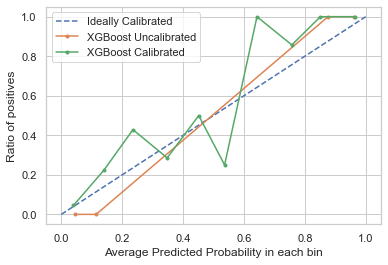

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=5)
calibrated = CalibratedClassifierCV(xgb, method='sigmoid', cv=10)
calibrated.fit(xtrain, ytrain)
probs = calibrated.predict_proba(xtest)[:, 1]
uncalibrated = xgb.predict_proba(xtest)[:,1]
fop_uncalibrated, mpv_uncalibrated = calibration_curve(ytest, uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(ytest, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Ideally Calibrated')
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'XGBoost Uncalibrated')
plt.plot(mpv_calibrated, fop_calibrated, marker='.', label = 'XGBoost Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [28]:
calibrated = CalibratedClassifierCV(xgb, method='sigmoid', cv=10)

scores_accuracy = cross_val_score(calibrated, X, Y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(calibrated, X, Y, cv=10, scoring='neg_log_loss')
scores_briar = cross_val_score(calibrated, X, Y, cv=10, scoring='neg_brier_score')
scores_auc = cross_val_score(calibrated, X, Y, cv=10, scoring='roc_auc')
scores_recall = cross_val_score(calibrated, X, Y, cv=10, scoring='recall')
scores_precision = cross_val_score(calibrated, X, Y, cv=10, scoring='precision')
scores_f1 = cross_val_score(calibrated, X, Y, cv=10, scoring='f1')
print('K-fold cross-validation results:')
print("XGBoost average accuracy is %2.3f" % scores_accuracy.mean())
print("XGBoost average log_loss is %2.3f" % -scores_log_loss.mean())
print("XGBoost average brier score is %2.3f" % -scores_briar.mean())
print("XGBoost average auc is %2.3f" % scores_auc.mean())
print("XGBoost average recall is %2.3f" % scores_recall.mean())
print("XGBoost average precision is %2.3f" % scores_precision.mean())
print("XGBoost average f1 is %2.3f" % scores_f1.mean())

K-fold cross-validation results:
XGBoost average accuracy is 0.920
XGBoost average log_loss is 0.226
XGBoost average brier score is 0.063
XGBoost average auc is 0.974
XGBoost average recall is 0.924
XGBoost average precision is 0.918
XGBoost average f1 is 0.919


In [17]:
#RFECV + XGBoost
X = X_balanced[['Age', 'Tscore_Hip_total', 'CRP', 'Cr', 'ALP', 'BUN', 'P', 'Ca', 'PTH', 'Vit_D3', 
       'BMD_vertebra', 'Tscore_vertebra', 'Zscore_vertebra', 
       'BMD_Hip_total', 'Zscore_hip_total', 'BMD_Hip_Neck', 'Tscore_Hip_neck', 
       'Zscore_Hip_neck', 'Histroy_Anticoagulant', 'Active_Smoking', 
       'History_Smoking', 'Calcium_Supplement', 'History_Diabetes_2']]

In [36]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42)

cv = GridSearchCV(xgb,params,cv=10, verbose=1)
cv.fit(X,Y.values.ravel(), verbose=1)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [37]:
display_results(cv)

Best parameters are: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 900}
Best Score is : 0.919693094629156 


0.845 + or -0.076 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.873 + or -0.055 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.896 + or -0.05 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.899 + or -0.048 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
0.899 + or -0.043 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900}
0.847 + or -0.068 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.889 + or -0.046 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
0.901 + or -0.043 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_

In [18]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=900,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.3)
xgb.fit(X,Y)

showResults(xgb, "XGBoost", X, Y)

K-fold cross-validation results:
XGBoost  average accuracy is 0.920
XGBoost  average log_loss is 0.242
XGBoost  average brier score is 0.068
XGBoost  average auc is 0.973
XGBoost  average recall is 0.953
XGBoost  average precision is 0.895
XGBoost  average f1 is 0.921


In [19]:
#RFECV + CatBoost
X = X_balanced[['Tscore_Hip_total', 'Cr', 'BMD_vertebra', 'Tscore_vertebra', 'Zscore_vertebra', 
                'BMD_Hip_total', 'Zscore_hip_total', 'BMD_Hip_Neck', 'Tscore_Hip_neck', 'Zscore_Hip_neck',
                'Histroy_Anticoagulant', 'Active_Smoking', 'History_Smoking', 'Calcium_Supplement', 
                'History_Diabetes_2']]

In [40]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42)

cv = GridSearchCV(xgb,params,cv=10, verbose=1)
cv.fit(X,Y.values.ravel(), verbose=1)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [41]:
display_results(cv)

Best parameters are: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 900}
Best Score is : 0.8566069906223358 


0.789 + or -0.086 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.813 + or -0.063 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.819 + or -0.064 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.817 + or -0.059 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
0.823 + or -0.053 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900}
0.81 + or -0.06 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.82 + or -0.045 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
0.832 + or -0.044 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_d

In [20]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=900,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.5)
xgb.fit(X,Y)

showResults(xgb, "XGBoost", X, Y)

K-fold cross-validation results:
XGBoost  average accuracy is 0.857
XGBoost  average log_loss is 0.358
XGBoost  average brier score is 0.111
XGBoost  average auc is 0.922
XGBoost  average recall is 0.903
XGBoost  average precision is 0.830
XGBoost  average f1 is 0.863


In [21]:
#RFECV + Logistic Regression
X = X_balanced[['Tscore_Hip_total', 'Cr', 'BMD_vertebra', 'Tscore_vertebra', 
                'Zscore_vertebra', 'BMD_Hip_total', 'Zscore_hip_total', 'BMD_Hip_Neck', 
                'Tscore_Hip_neck', 'Zscore_Hip_neck', 'Histroy_Anticoagulant', 'Active_Smoking', 
                'History_Smoking', 'Calcium_Supplement', 'History_Diabetes_2']]

In [44]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42)

cv = GridSearchCV(xgb,params,cv=10, verbose=1)
cv.fit(X,Y.values.ravel(), verbose=1)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [45]:
display_results(cv)

Best parameters are: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 900}
Best Score is : 0.8566069906223358 


0.789 + or -0.086 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.813 + or -0.063 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.819 + or -0.064 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.817 + or -0.059 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
0.823 + or -0.053 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900}
0.81 + or -0.06 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.82 + or -0.045 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
0.832 + or -0.044 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_d

In [22]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=900,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.5)
xgb.fit(X,Y)

showResults(xgb, "XGBoost", X, Y)

K-fold cross-validation results:
XGBoost  average accuracy is 0.857
XGBoost  average log_loss is 0.358
XGBoost  average brier score is 0.111
XGBoost  average auc is 0.922
XGBoost  average recall is 0.903
XGBoost  average precision is 0.830
XGBoost  average f1 is 0.863


In [23]:
#RFECV + LightGBM
X = X_balanced[['Tscore_Hip_total', 'CRP', 'Cr', 'ALP', 'BUN', 'P', 'Ca', 'PTH', 'Vit_D3',
                'Tscore_vertebra', 'Zscore_vertebra', 'BMD_Hip_total', 'Tscore_Hip_neck', 'BMI']]

In [48]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42)

cv = GridSearchCV(xgb,params,cv=10, verbose=1)
cv.fit(X,Y.values.ravel(), verbose=1)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [49]:
display_results(cv)

Best parameters are: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 900}
Best Score is : 0.9093989769820972 


0.822 + or -0.037 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.866 + or -0.05 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.861 + or -0.045 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.871 + or -0.045 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
0.871 + or -0.05 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900}
0.86 + or -0.04 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.892 + or -0.032 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
0.888 + or -0.038 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_dept

In [24]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=900,
                   max_depth = 4, learning_rate = 0.1, colsample_bytree = 0.8)
xgb.fit(X,Y)

showResults(xgb, "XGBoost", X, Y)

K-fold cross-validation results:
XGBoost  average accuracy is 0.909
XGBoost  average log_loss is 0.264
XGBoost  average brier score is 0.075
XGBoost  average auc is 0.963
XGBoost  average recall is 0.965
XGBoost  average precision is 0.871
XGBoost  average f1 is 0.915


In [25]:
#RFECV + ADABoost
X = X_balanced[['Cr', 'ALP']]

In [52]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42)

cv = GridSearchCV(xgb,params,cv=10, verbose=1)
cv.fit(X,Y.values.ravel(), verbose=1)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [53]:
display_results(cv)

Best parameters are: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Best Score is : 0.5891304347826087 


0.571 + or -0.064 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.574 + or -0.067 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.561 + or -0.052 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.555 + or -0.057 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
0.55 + or -0.059 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900}
0.57 + or -0.062 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.547 + or -0.059 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
0.541 + or -0.07 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_de

In [26]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=500,
                   max_depth = 3, learning_rate = 0.01, colsample_bytree = 0.3)
xgb.fit(X,Y)

showResults(xgb, "XGBoost", X, Y)

K-fold cross-validation results:
XGBoost  average accuracy is 0.589
XGBoost  average log_loss is 0.688
XGBoost  average brier score is 0.246
XGBoost  average auc is 0.597
XGBoost  average recall is 0.628
XGBoost  average precision is 0.587
XGBoost  average f1 is 0.604
